In [1]:
import cv2
import numpy as np
import glob
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print ("OpenCV:",  cv2.__version__)
print ("Numpy : ", np.__version__)
print ("Python:",  sys.version)

OpenCV: 4.7.0
Numpy :  1.23.5
Python: 3.10.9 | packaged by conda-forge | (main, Jan 11 2023, 15:15:40) [MSC v.1916 64 bit (AMD64)]


In [4]:
# load training data
dim = 120*320
X = np.empty((0, dim))
y = np.empty((0, 4))
training_data = glob.glob('test_run.npz')

for single_npz in training_data:
    with np.load(single_npz) as data:
        train = data['train']
        train_labels = data['train_labels']
    X = np.vstack((X, train))
    y = np.vstack((y, train_labels))

print ('Image array shape: ', X.shape)
print ('Label array shape: ', y.shape)

Image array shape:  (167, 38400)
Label array shape:  (167, 4)


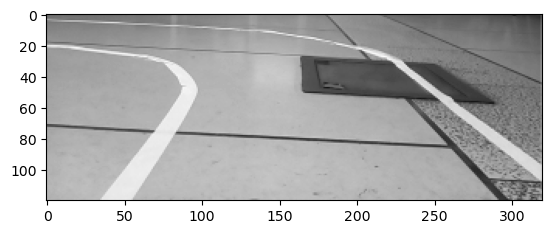

In [6]:
plt.imshow(X[0].reshape(120, 320), cmap='gray')

In [7]:
# create a neural network
model = cv2.ml.ANN_MLP_create()
layer_sizes = np.int32([dim, 32, 4])
model.setLayerSizes(layer_sizes)
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
model.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 20, 0.01))

In [8]:
# training
model.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.float32(y))

True

In [9]:
# evaluate on training data
ret, resp = model.predict(X)
prediction = resp.argmax(-1)
true_labels = y.argmax(-1)

train_rate = np.mean(prediction == true_labels)
print (len(prediction))
print (prediction)
print ('Train accuracy: ', "{0:.2f}%".format(train_rate * 100))

167
[1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]
Train accuracy:  28.14%


In [10]:
# save model
model.save('model_test.xml')

In [ ]:
# load model
model = cv2.ml.ANN_MLP_load('model_test.xml')

In [ ]:
# predict
ret, resp = model.predict(X)
print (len(resp))
resp.argmax(-1)

10


array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2])